In [73]:
import numpy as np
from sympy import *
#resuelva el siguiente sistema no homogéneos por el método de variación de parámetros.
t = symbols('t')
x= symbols('x', cls=Function)
y = symbols('y', cls=Function)
phi = symbols('phi', cls=Function)
c1, c2 = symbols('c1 c2')

In [74]:
coeficientes = Matrix([[3, -3], [2, -2]])
resultados = Matrix([4, -1])
autovectores = coeficientes.eigenvects()
#autovector tiene como estructura: ([autovalor, multiplicidad, [autovectore]],...)
autovectores[0][0]

0

In [75]:
s1 = autovectores[0][2][0]*exp(autovectores[0][0]*t)
s2 = autovectores[1][2][0]*exp(autovectores[1][0]*t)
phi = Matrix([[s1[0], s2[0]*2], [s1[1], s2[1]*2]])
phi_inv = phi.inv()
display(phi,phi_inv)

Matrix([
[1, 3*exp(t)],
[1, 2*exp(t)]])

Matrix([
[     -2,        3],
[exp(-t), -exp(-t)]])

In [76]:
#calculo Xp = phi*integral(phi^-1*F(t)dt)

Xp = phi*integrate(phi_inv*resultados,t)
Xp

Matrix([
[-11*t - 15],
[-11*t - 10]])

In [78]:
#solucion general x(t) = Xh + Xp
constantes = Matrix([c1, c2])
X = phi*constantes+Xp
X

Matrix([
[c1 + 3*c2*exp(t) - 11*t - 15],
[c1 + 2*c2*exp(t) - 11*t - 10]])

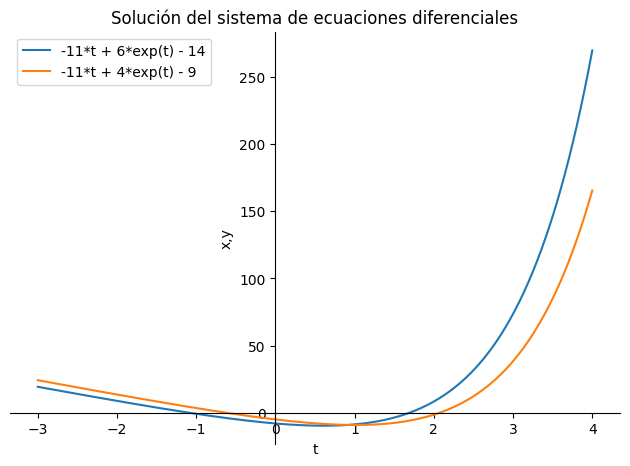

In [88]:

# Reemplazar las constantes de integración por valores específicos
X_reemplazado = X.subs({c1: 1, c2: 2})

# Graficar la solución con las constantes reemplazadas
plot(X_reemplazado[0],X_reemplazado[1], (t, -3, 4), ylabel='x,y', xlabel='t',legend=True,title='Solución del sistema de ecuaciones diferenciales')